### 1번 문제
> For문을 이용하여 구구단을 출력하라
    2단부터 9단까지 구구단을 print를 이용하여 출력하라.

In [244]:
for i in range(8):
    print("    [", i+2, "단 ]")
    for j in range(9):
        print(i+2, " X ", j+1, " = ", (i+2)*(j+1))
    print("----------------")

    [ 2 단 ]
2  X  1  =  2
2  X  2  =  4
2  X  3  =  6
2  X  4  =  8
2  X  5  =  10
2  X  6  =  12
2  X  7  =  14
2  X  8  =  16
2  X  9  =  18
----------------
    [ 3 단 ]
3  X  1  =  3
3  X  2  =  6
3  X  3  =  9
3  X  4  =  12
3  X  5  =  15
3  X  6  =  18
3  X  7  =  21
3  X  8  =  24
3  X  9  =  27
----------------
    [ 4 단 ]
4  X  1  =  4
4  X  2  =  8
4  X  3  =  12
4  X  4  =  16
4  X  5  =  20
4  X  6  =  24
4  X  7  =  28
4  X  8  =  32
4  X  9  =  36
----------------
    [ 5 단 ]
5  X  1  =  5
5  X  2  =  10
5  X  3  =  15
5  X  4  =  20
5  X  5  =  25
5  X  6  =  30
5  X  7  =  35
5  X  8  =  40
5  X  9  =  45
----------------
    [ 6 단 ]
6  X  1  =  6
6  X  2  =  12
6  X  3  =  18
6  X  4  =  24
6  X  5  =  30
6  X  6  =  36
6  X  7  =  42
6  X  8  =  48
6  X  9  =  54
----------------
    [ 7 단 ]
7  X  1  =  7
7  X  2  =  14
7  X  3  =  21
7  X  4  =  28
7  X  5  =  35
7  X  6  =  42
7  X  7  =  49
7  X  8  =  56
7  X  9  =  63
----------------
    [ 8 단 ]
8  X  1  =  8
8 

### 2번 문제
> 2개의 주사위를 던져서 두 수의 합이 5의 배수인 경우를 출력하라.
1. 2개의 for문을 이용할 것
2. If문을 이용하여 5의 배수 조건을 줄 것

In [245]:
for i in range(6):
    for j in range(6):
        if (i+1+j+1) % 5 == 0:
            print(i+1,",",j+1," 두 눈의 합은 ", i+j+2, "이다.")

1 , 4  두 눈의 합은  5 이다.
2 , 3  두 눈의 합은  5 이다.
3 , 2  두 눈의 합은  5 이다.
4 , 1  두 눈의 합은  5 이다.
4 , 6  두 눈의 합은  10 이다.
5 , 5  두 눈의 합은  10 이다.
6 , 4  두 눈의 합은  10 이다.


### 3번 문제
> Pandas를 이용하여 다음과 같은 데이터프레임을 만들고 데이터프레임을 수정하라.

|   | 0 | 1 |  2 |
|:-:|:-:|:-:|:--:|
| 0 | 1 | 2 |  3 |
| 1 | 7 | 8 |  9 |
| 2 | 4 | 5 |  6 |
| 3 | 3 | 5 | 10 |

1. 컬럼의 이름을 A, B, C로 변경
2. D라는 새로운 컬럼에 shift 함수를 이용하여 C 컬럼의 차를 D 컬럼에 생성(NaN값인 경우에는 0으로 대체)
3. A 컬럼을 기준으로 오름차순 정렬
4. 인덱스의 값을 새로 지정(기존의 인덱스는 삭제)
5. 이 모든 과정은 원본의 데이터를 수정 

In [246]:
import pandas as pd
df = pd.DataFrame({0:[1,7,4,3], 1:[2,8,5,5], 2:[3,9,6,10]})

df.columns = ["A", "B", "C"]

df["D"] = df["C"] - df["C"].shift(1)
df.fillna(0, inplace=True)

df.sort_values("A", inplace=True)
df.reset_index(drop=True, inplace=True)
df

,A,B,C,D
0,1,2,3,0.0
1,3,5,10,4.0
2,4,5,6,-3.0
3,7,8,9,6.0


### 4번 문제
> 2014,2015,2016 csv파일을 로드하여 데이터를 수정하라.

1. 3개의 데이터프레임을 결합하시오 (유니언 결합)
2. 구분 컬럼의 값을 datetime의 형태로 변환하라. 
3. 구분 컬럼에서 년도만 따로 출력하여 파생변수 년도를 생성하라.
4. 년도 별 평균 사망자, 총 사망자를 출력하라. 
5. 년도 별 사고 대비 사망율을 출력하라.

In [247]:
df_2014 = pd.read_csv("./csv/2014.csv", encoding= "CP949")
df_2015 = pd.read_csv("./csv/2015.csv", encoding= "CP949")
df_2016 = pd.read_csv("./csv/2016.csv", encoding= "CP949")

df_concat = pd.concat([df_2014, df_2015, df_2016], axis=0)
df_concat["구분"] = pd.to_datetime(df_concat["구분"], format="%Y년%m월")

# df_concat["년도"] = df_concat["구분"].dt.year
df_concat["년도"] = df_concat["구분"].dt.strftime("%Y")

In [248]:
#년도 별 평균, 총 사망자 출력
death_mean = df_concat.groupby("년도").mean()["사망(명)"]
death_sum = df_concat.groupby("년도").sum()["사망(명)"]
df_death = pd.concat([death_mean, death_sum],axis=1)
df_death.columns = ["평균 사망자", "총 사망자"]
df_death

,평균 사망자,총 사망자
년도,,
2014,10.833333,130
2015,9.000000,108
2016,8.166667,98


In [249]:
# 5. 년도 별 사고 대비 사망율을 출력하라.
df_byyear = df_concat.groupby("년도").sum()
df_byyear = df_byyear["사망(명)"]/df_byyear["사고(건)"]*100
df_byyear = df_byyear.reset_index(drop=False)
df_byyear.columns = ["년도별", "사고 대비 사망률"]
df_byyear.index = [" ", " ", " "]

def String(x):
    return str(x)

df_byyear["사고 대비 사망률"] = df_byyear["사고 대비 사망률"].apply(String) + "%"
df_byyear

,년도별,사고 대비 사망률
,2014,5.3586150041220115%
,2015,3.9985190670122175%
,2016,4.027949034114262%


### 5번 문제
> 세종시.csv 파일을 pandas를 이용하여 read 후 데이터프레임을 수정하라.

1. pandas를 이용하여 csv 파일을 로드한다. (주소는 상대경로로 지정)
2. "법정동코드", "특수지구분코드", "특수지구분명", "공동주택코드", "특수지명" 컬럼을 삭제한다. 
3. "기준연월" 파생변수를 생성하여 "기준연도" + "기준월" 데이터를 삽입한다. 
4. pivot_table을 이용하여 "기준연월"및 "공동주택구분명" 별 "공시가격"의 평균값을 구하고 결측치의 값은 0으로 한 뒤 바형 그래프로 출력한다. 

In [250]:
df_sj = pd.read_csv("./csv/세종시.csv", encoding= "CP949")
df_sj.drop(["법정동코드", "특수지구분코드", "특수지구분명", "공동주택코드", "특수지명"], axis=1, inplace=True)
df_sj["기준연월"] = df_sj["기준연도"].apply(String) + "년" + df_sj["기준월"].apply(String) + "월"

# 4.
df_pivot = pd.pivot_table(df_sj, index=["기준연월"], columns=["공동주택구분명"], values=["공시가격"], aggfunc='mean')
df_pivot.fillna(0, inplace=True)
df_pivot

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_51631/540157821.py:1: DtypeWarning: Columns (5,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sj = pd.read_csv("./csv/세종시.csv", encoding= "CP949")


공시가격                            
공동주택구분명           다세대            빌라           아파트
기준연월                                             
2012년6월  2.587097e+07  7.552632e+07  0.000000e+00
2013년1월  2.778281e+07  4.953099e+07  9.652538e+07
2013년6월  2.691667e+07  2.747368e+07  1.580193e+08
2014년1월  3.146382e+07  5.103072e+07  1.124964e+08
2014년6월  0.000000e+00  3.382143e+07  1.650855e+08
2015년1월  3.170355e+07  4.969918e+07  1.541759e+08
2015년6월  1.135455e+08  6.380488e+07  2.277852e+08
2016년1월  3.400189e+07  5.267301e+07  1.666428e+08
2016년6월  0.000000e+00  0.000000e+00  1.580739e+08
2017년1월  3.413587e+07  5.421607e+07  1.800320e+08
2017년6월  0.000000e+00  0.000000e+00  2.905774e+08
2018년1월  3.546249e+07  5.649077e+07  1.978507e+08
2018년6월  0.000000e+00  1.012703e+08  9.216667e+07
2019년1월  3.708221e+07  5.938935e+07  2.010505e+08
2019년6월  9.220000e+07  0.000000e+00  1.826941e+08
2020년1월  3.600866e+07  6.407009e+07  2.117557e+08
2020년6월  0.000000e+00  8.987588e+07  4.792653e+07
2021년1월  3.765672e+07  6.412996e+07  4.111932e+08
2021년6월  0.000000e+00  0.000000e+00  2.532574e+08
2022년1월  3.967507e+07  6.795609e+07  3.972925e+08

<AxesSubplot:ylabel='기준연월'>

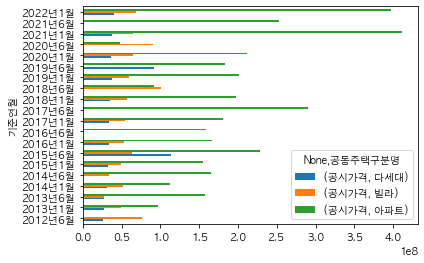

In [251]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

df_pivot.plot.barh()

end!